# 기본 설치 및 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install wavinfo

In [ ]:
!pip install moviepy

In [ ]:
!pip install ffmpeg

In [ ]:
!pip install pydub

#음성에서의 노이즈 제거
DTLN 모델의 경우 현재 wav 형식만 입력이 가능하여, 노이즈 제거를 원하는 음성을 wav 파일 형태로 변환 해주어야 함
아래의 셀의 경우, 특정 음성 파일 에 적용 시키고 싶을 때, 작성해 주시면 됩니다.

audio_file_path 부분에 음성 위치

In [ ]:
import os, sys, re

#형식 변환해야 하는 음성 파일 위치
audio_file_path = "/content/drive/MyDrive/Colab_project/DTLN/video_with_noise/Hearing_Test.mp4.mp3" 

output_file_type = "wav" 
output_file_path = re.search("^[\/].+\/", audio_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", audio_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = audio_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileExtension'] = output_file_type
os.environ['fileName'] = filename_raw

!ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"_changed."$fileExtension"

In [ ]:
#import os
#import commands

#import logging
#import traceback

#if __name__ == '__main__':
#outputdir = os.path.abspath("/content/drive/MyDrive/Colab_project/DTLN/video_with_noise")
#   for root, dirs, files in os.walk('.'):
#   for f in files:
#   path = os.path.join(root, f)
#   base, ext = os.path.splitext(f)
#   outputpath = os.path.join(outputdir, base + ".wav")
#   if ext == '.m4a':
#   print 'converting %s to %s' % (path, outputpath)
#   status, output = commands.getstatusoutput('ffmpeg -i "%s" "%s"' % (path, outputpath))
#   if status:
#   logging.error (output)

In [ ]:
#!python run_evaluation.py -i /content/drive/MyDrive/Colab_project/DTLN/video_with_noise -o /content/drive/MyDrive/Colab_project/DTLN/video_without_noise -m ./model.h5

# 영상에서의 음성 추출& 음성 없앤 영상 제작


In [ ]:
cd /content/drive/MyDrive/Colab_project/DTLN/video_with_noise

/content/drive/MyDrive/Colab_project/DTLN/video_with_noise


MP4 형식의 파일에서 음성만 가지고 와서 mp3 형태로 저장

In [ ]:
import os
import moviepy.editor as mp #pip install moviepy

#!cd /content/drive/My Drive/Colab_project/DTLN/video_with_noise/
path= ("Hearing_Test.mp4")
videoclip = mp.VideoFileClip(path)
audioclip = videoclip.audio
audioclip.write_audiofile("{}"".mp3".format(path))


[MoviePy] Writing audio in Hearing_Test.mp4.mp3


100%|██████████| 1719/1719 [00:02<00:00, 756.56it/s]

[MoviePy] Done.


아래는 음성이 없는 영상을 만들어 내는 과정

In [ ]:
from moviepy.editor import VideoFileClip

videoclip = VideoFileClip("Hearing_Test.mp4")
new_clip = videoclip.without_audio()
new_clip.write_videofile("Hearing_Test_no_audio.mp4")

[MoviePy] >>>> Building video Hearing_Test_no_audio.mp4
[MoviePy] Writing video Hearing_Test_no_audio.mp4


100%|██████████| 2336/2336 [01:30<00:00, 25.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Hearing_Test_no_audio.mp4 



DTLN 의 경우 wav 형식의 파일만 가능하기에, 이에 맞추어 mp3 형태의 파일을 wav 형태로 변환시켜주었습니다.

In [ ]:
from os import path
from pydub import AudioSegment

# files                                                                         
src = "Hearing_Test.mp4.mp3"
dst = "Hearing_Test.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='Hearing_Test.wav'>

#추출한 음성에서 노이즈 제거 후, 노이즈 제거 시킨 음성을 음성이 없는 비디오와 결합

In [ ]:
cd /content/drive/MyDrive/Colab_project/DTLN

/content/drive/MyDrive/Colab_project/DTLN


In [ ]:
!python run_evaluation.py -i /content/drive/MyDrive/Colab_project/DTLN/video_with_noise -o /content/drive/MyDrive/Colab_project/DTLN/video_without_noise -m ./model.h5


2021-12-15 03:32:59.980156: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 lambda (Lambda)                [(None, None, 257),  0           ['input_1[0][0]']                
                                 (None, None, 257)]                                               
                                                                                                  
 lstm (LSTM)                    (None, None, 128)    197632      ['lambda[0][0]']                 
                               

In [ ]:
from moviepy.editor import *
videoclip = VideoFileClip("/content/drive/MyDrive/Colab_project/DTLN/video_with_noise/Hearing_Test_no_audio.mp4")
audioclip = AudioFileClip("/content/drive/MyDrive/Colab_project/DTLN/video_without_noise/Hearing_Test.wav")

new_audioclip = CompositeAudioClip([audioclip])
videoclip.audio = new_audioclip
videoclip.write_videofile("./video_without_noise/Hearing_Test.mp4")

[MoviePy] >>>> Building video ./video_without_noise/Hearing_Test.mp4
[MoviePy] Writing audio in Hearing_TestTEMP_MPY_wvf_snd.mp3


100%|██████████| 1719/1719 [00:01<00:00, 995.29it/s] 

[MoviePy] Done.
[MoviePy] Writing video ./video_without_noise/Hearing_Test.mp4



100%|██████████| 2337/2337 [01:16<00:00, 30.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./video_without_noise/Hearing_Test.mp4 



In [ ]:
cd /content/drive/MyDrive/Colab_project/DTLN/video_with_noise

/content/drive/MyDrive/Colab_project/DTLN/video_with_noise


In [ ]:
#import os, sys, re

#audio_file_path = "/content/drive/MyDrive/Colab_project/DTLN/video_with_noise/noisex.m4a"
#output_file_type = "wav" 
#output_file_path = re.search("^[\/].+\/", audio_file_path)
#output_file_path_raw = output_file_path.group(0)
#delsplit = re.search("\/(?:.(?!\/))+$", audio_file_path)
#filename = re.sub("^[\/]", "", delsplit.group(0))
#filename_raw = re.sub(".{4}$", "", filename)
#file_extension = re.search(".{3}$", filename)
#file_extension_raw = file_extension.group(0)

#os.environ['inputFile'] = audio_file_path
#os.environ['outputPath'] = output_file_path_raw
#os.environ['fileExtension'] = output_file_type
#os.environ['fileName'] = filename_raw

#!ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"."$fileExtension"

In [ ]:
#import os
#import commands

#import logging
#import traceback

#if __name__ == '__main__':
#outputdir = os.path.abspath("/content/drive/MyDrive/Colab_project/DTLN/video_with_noise")
#   for root, dirs, files in os.walk('.'):
#   for f in files:
#   path = os.path.join(root, f)
#   base, ext = os.path.splitext(f)
#   outputpath = os.path.join(outputdir, base + ".wav")
#   if ext == '.m4a':
#   print 'converting %s to %s' % (path, outputpath)
#   status, output = commands.getstatusoutput('ffmpeg -i "%s" "%s"' % (path, outputpath))
#   if status:
#   logging.error (output)

In [ ]:
#from os import path
#from pydub import AudioSegment

# files                                                                         
#src = "노이즈.m4a"
#dst = "노이즈.wav"

# convert wav to mp3                                                            
#sound = AudioSegment.from_mp3(src)
#sound.export(dst, format="wav")

# files                                                                         
#src = "노이즈x.m4a"
#dst = "노이즈x.wav"

# convert wav to mp3                                                            
#sound = AudioSegment.from_mp3(src)
#sound.export(dst, format="wav")

In [ ]:
!python run_evaluation.py -i /content/drive/MyDrive/Colab_project/DTLN/video_with_noise -o /content/drive/MyDrive/Colab_project/DTLN/without_noise -m ./model.h5


python3: can't open file 'run_evaluation.py': [Errno 2] No such file or directory


In [ ]:
cd /content/drive/My Drive/Colab_project/DTLN/

/content/drive/My Drive/Colab_project/DTLN


#Time domain 및 Frequency domain 의 형태로 음성 시각화
ppt 자료로 쓸 부분

[0. 0. 0. ... 0. 0. 0.] (1718357,)


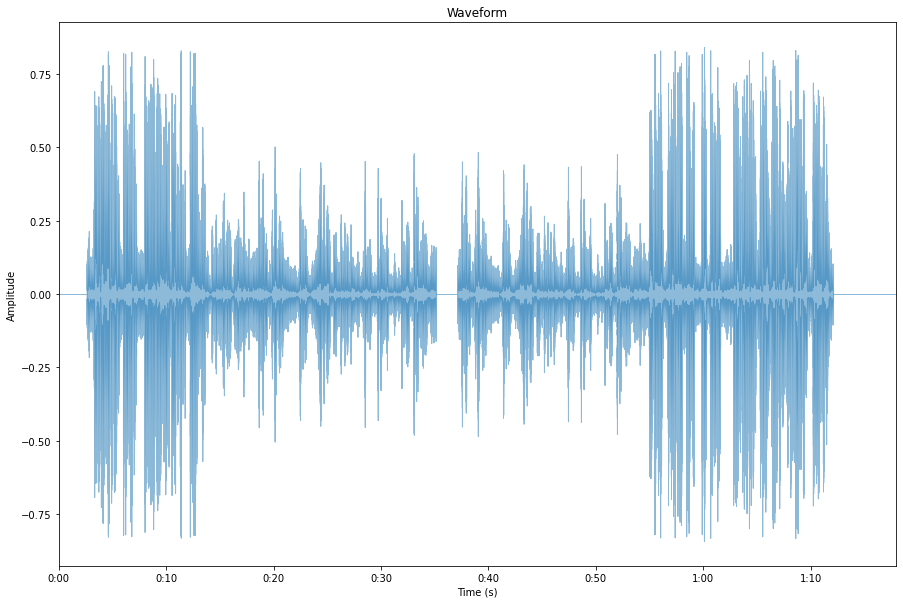

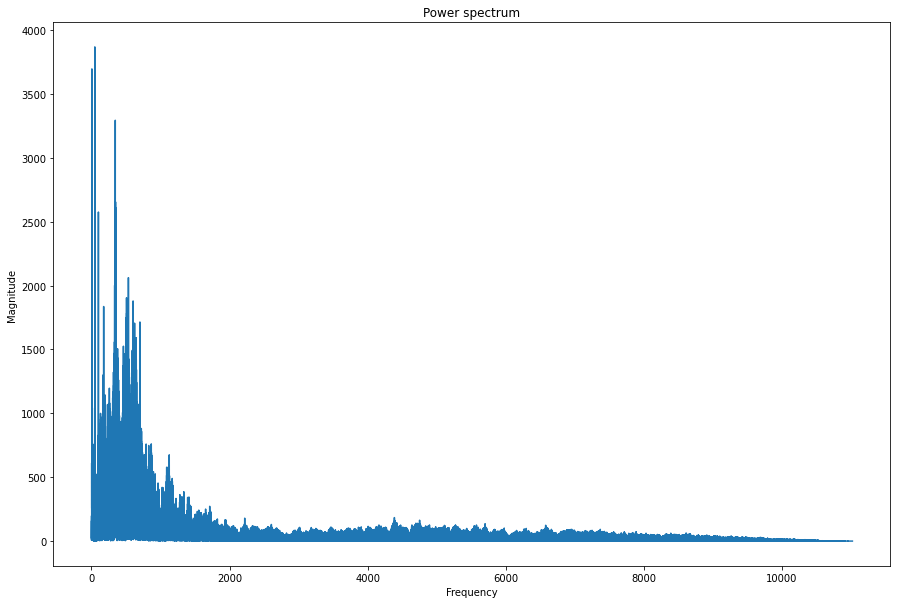

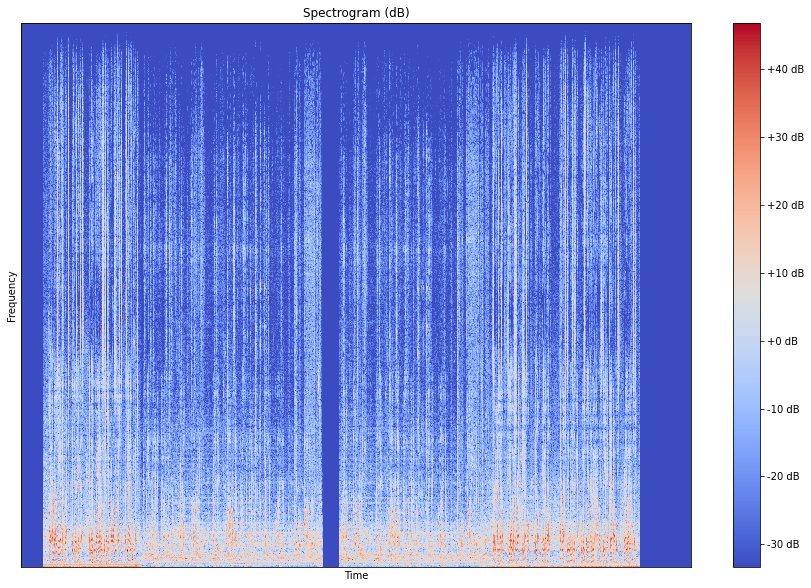

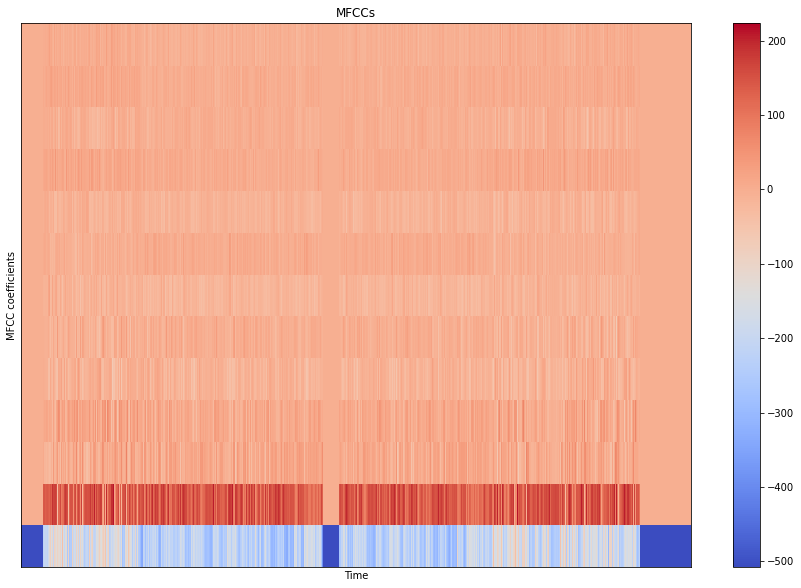

In [ ]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

#frequency 및 time 도메인의 형태로 보고 싶은 음성 파일 위치 입력.
file = "/content/drive/MyDrive/Colab_project/DTLN/video_with_noise/Hearing_Test.wav"

sig, sr = librosa.load(file, sr=22050)
sig2, sr = librosa.load(file2, sr=22050)

print(sig,sig.shape)

plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(sig, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

[0. 0. 0. ... 0. 0. 0.] (1718313,)


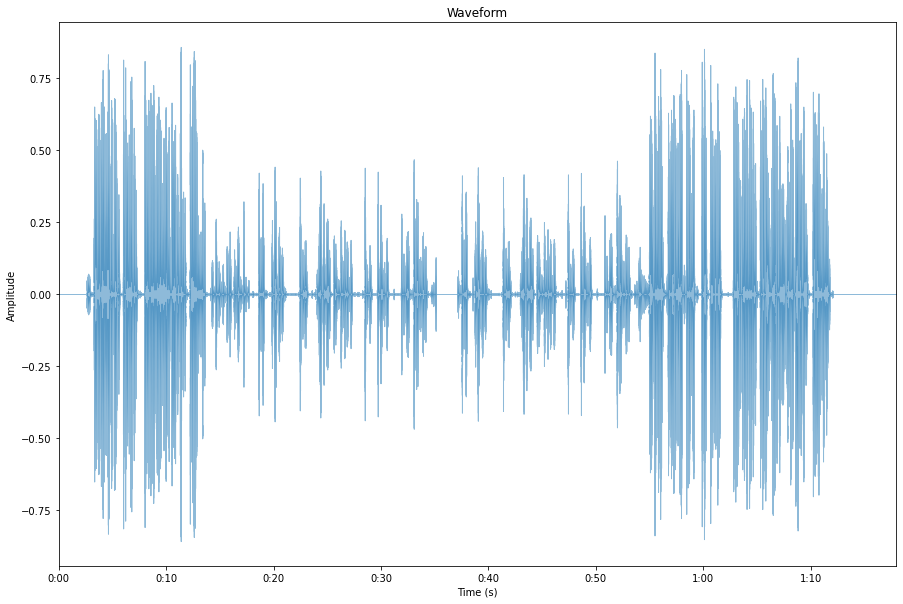

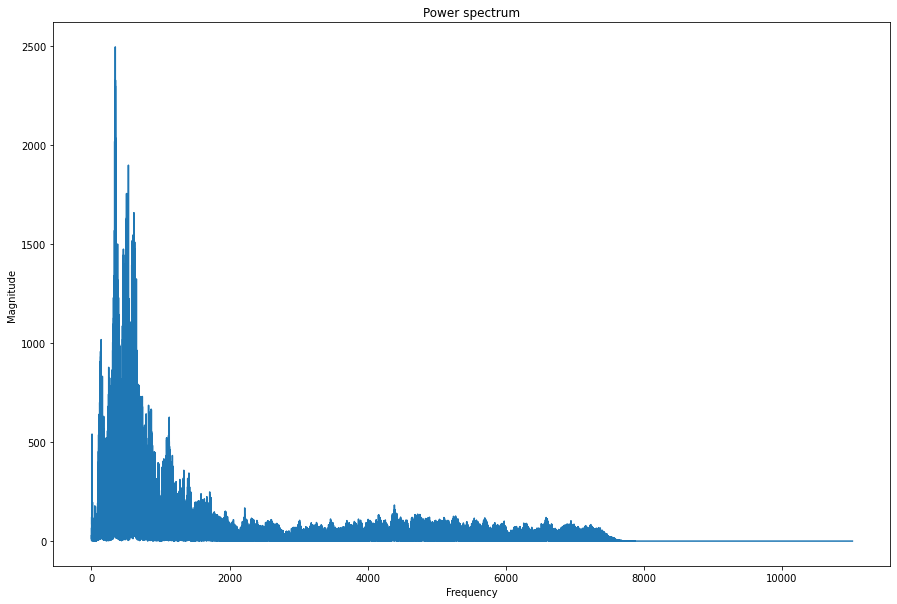

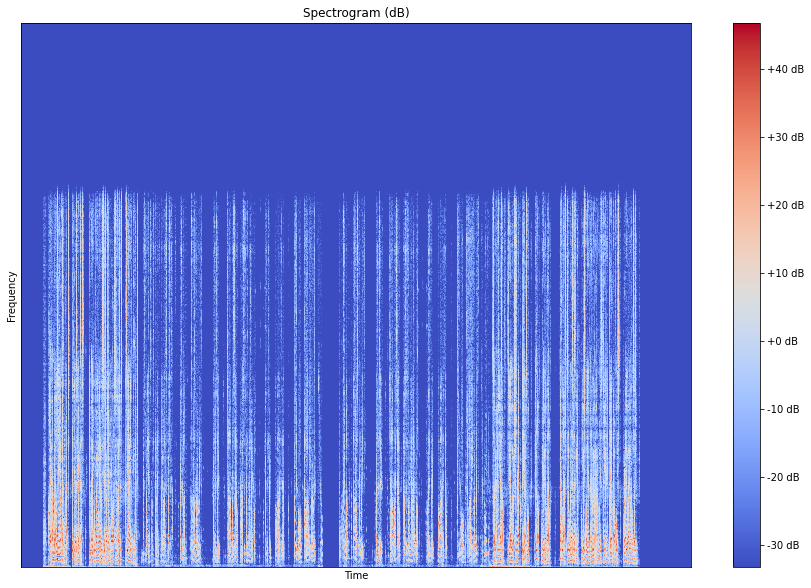

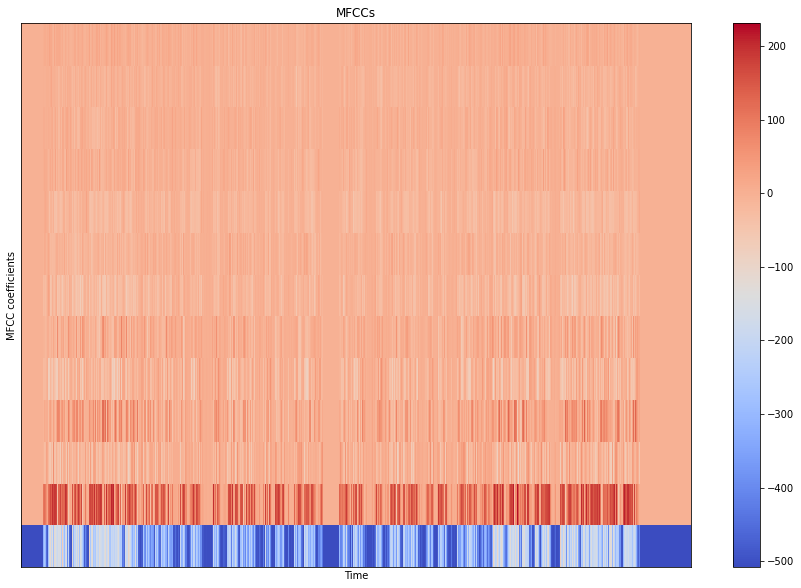

In [ ]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

#frequency 및 time 도메인의 형태로 보고 싶은 음성 파일 위치 입력.
file = "/content/drive/MyDrive/Colab_project/DTLN/video_without_noise/Hearing_Test.wav"

sig, sr = librosa.load(file, sr=22050)

print(sig,sig.shape)

plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용할 생각.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")


# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(sig, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()